<a href="https://colab.research.google.com/github/charlielu05/DS-Scratchpad/blob/main/S_Brunton_FFT_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
plt.rcParams['figure.figsize'] = [20,12]

In [3]:
# create signal with two frequencies
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
f_noisy = f + 2.5*np.random.randn(len(t))

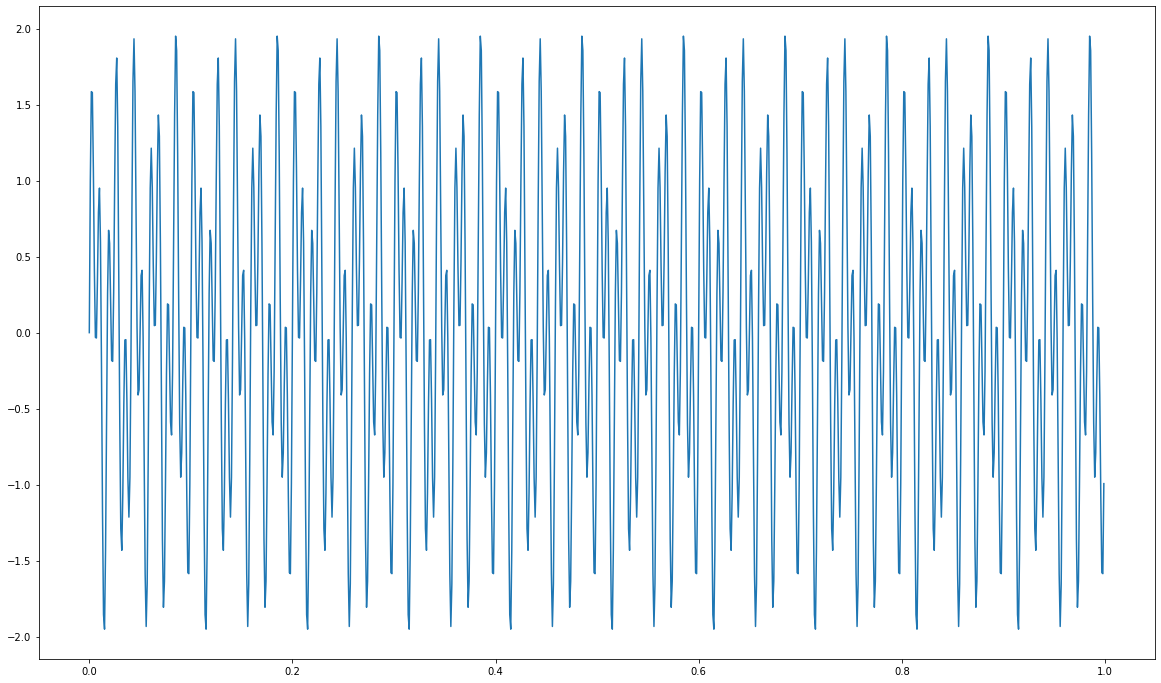

In [8]:
plt.plot(t, f)

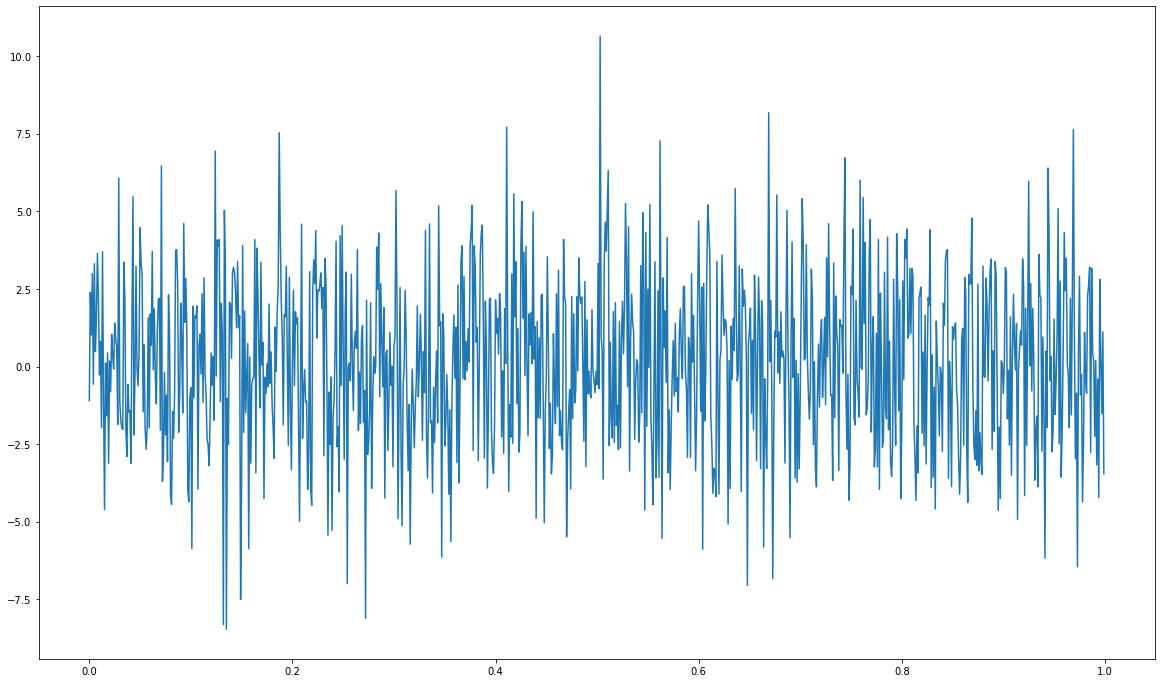

In [9]:
plt.plot(t, f_noisy)

In [10]:
n = len(t)
fhat = np.fft.fft(f_noisy, n)

In [12]:
fhat.shape

(1000,)

In [14]:
fhat[0]

(130.10093033624852+0j)

In [15]:
 fhat[-1]

(-35.288459528964424-38.364070547210915j)

Power spectrum

In [16]:
PSD = fhat * np.conj(fhat) / n

X-axis of frequencies

In [17]:
freq = (1/(dt*n)) * np.arange(n)

In [18]:
L = np.arange(1, np.floor(n/2), dtype='int')

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


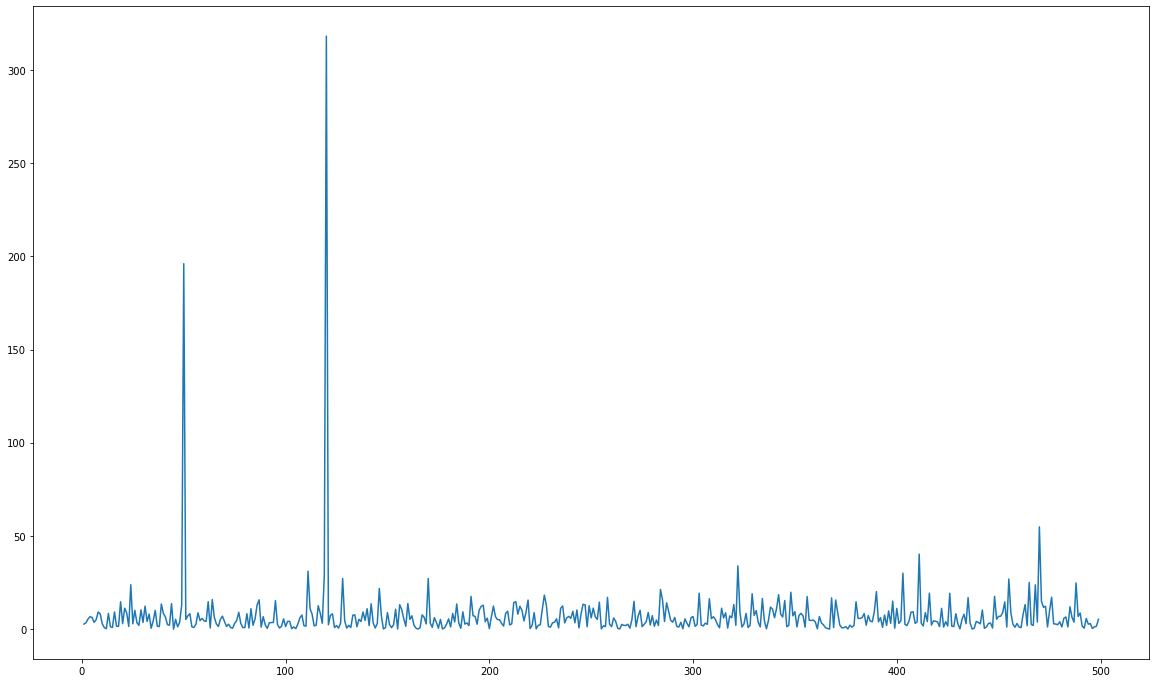

In [20]:
plt.plot(freq[L], PSD[L])

The plot shows us that most of the signal is at around 50 and 110 hz

In [21]:
PSD.shape

(1000,)

In [22]:
filtered_psd = PSD > 100

In [23]:
filtered_psd.sum()

4

In [25]:
# filtered fhat
fhat_filtered = filtered_psd * fhat

In [26]:
ffilt = np.fft.ifft(fhat_filtered)

In [27]:
ffilt.shape

(1000,)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


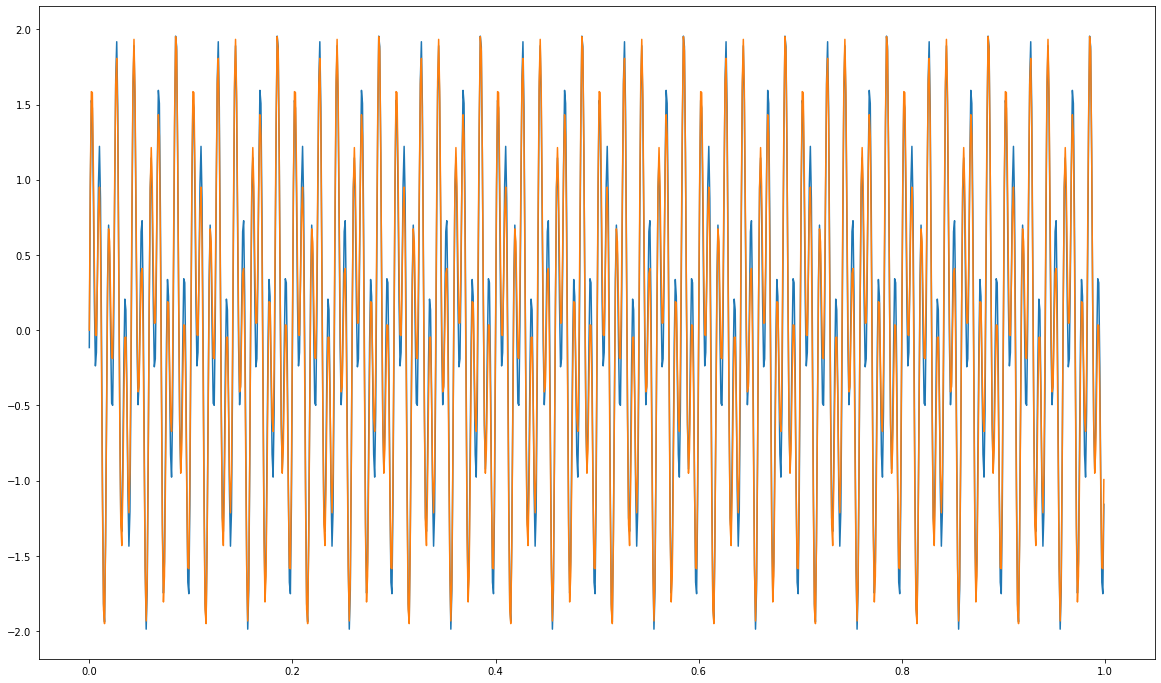

In [32]:
plt.plot(t, ffilt)
plt.plot(t, f)